In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1979.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1979,17950,45,28,3532
1,1979,17935,241,25,3502
2,1979,17687,11,40,3500
3,1979,17841,51,15,3555
4,1979,17621,4,13,3514
...,...,...,...,...,...
1857,1979,17052,113,37,3564
1858,1979,18063,410,40,3498
1859,1979,17488,126,31,3552
1860,1979,17101,141,26,3556


In [3]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1862, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1862 non-null   int64
 1   Maximum length (m))  1862 non-null   int64
 2   Recession(m),        1862 non-null   int64
 3   Rate/yr(m)           1862 non-null   int64
 4   Snout altitude (m)   1862 non-null   int64
dtypes: int64(5)
memory usage: 72.9 KB


In [5]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [6]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1862


In [7]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [8]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [9]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1979,17950,45,28,3532
1,1979,17935,241,25,3502
2,1979,17687,11,40,3500
3,1979,17841,51,15,3555
4,1979,17621,4,13,3514


In [10]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0090,-0.0052,0.0074
"Recession(m),",NaN,-0.0090,1.0000,0.0013,-0.0114
Rate/yr(m),NaN,-0.0052,0.0013,1.0000,0.0016
Snout altitude (m),NaN,0.0074,-0.0114,0.0016,1.0000


In [11]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)     0.0074
Rate/yr(m)            -0.0052
Recession(m),         -0.0090
Year                      NaN
Name: Maximum length (m)), dtype: float64

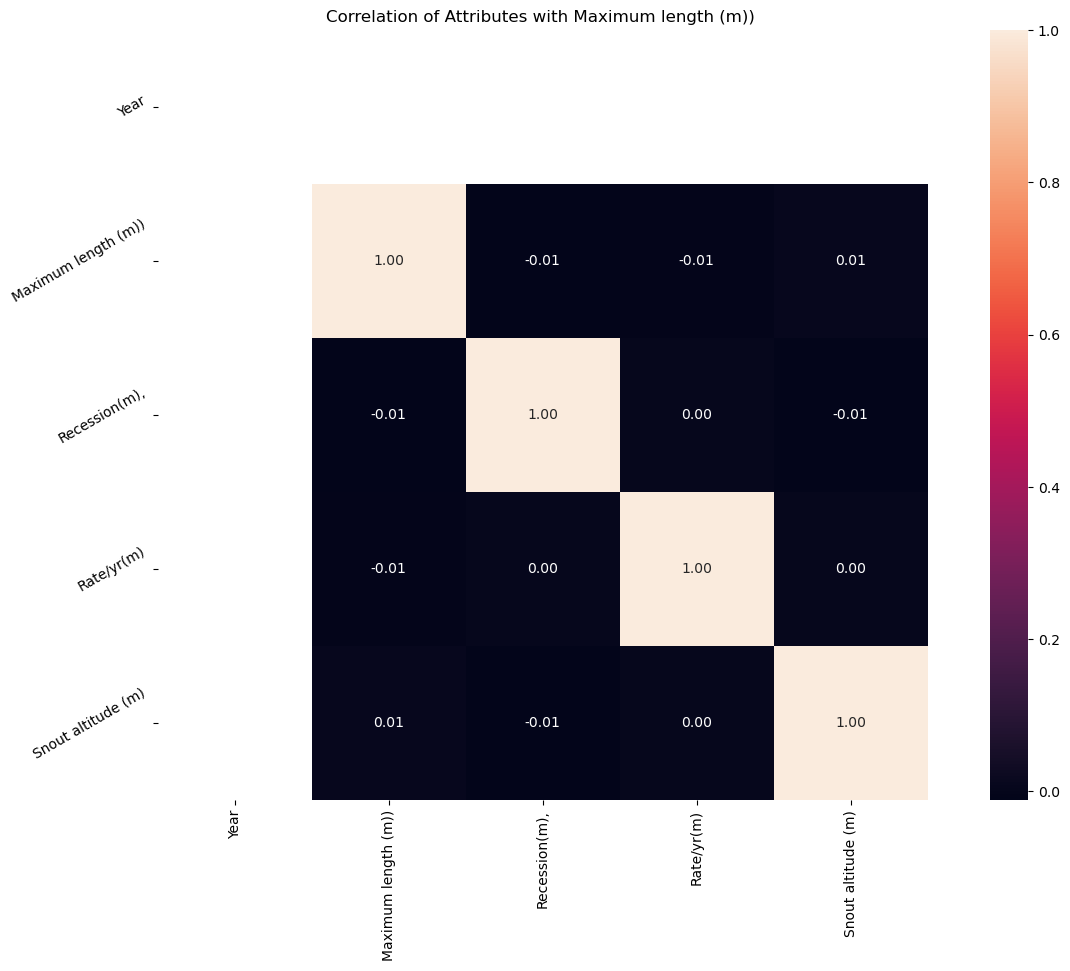

In [12]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

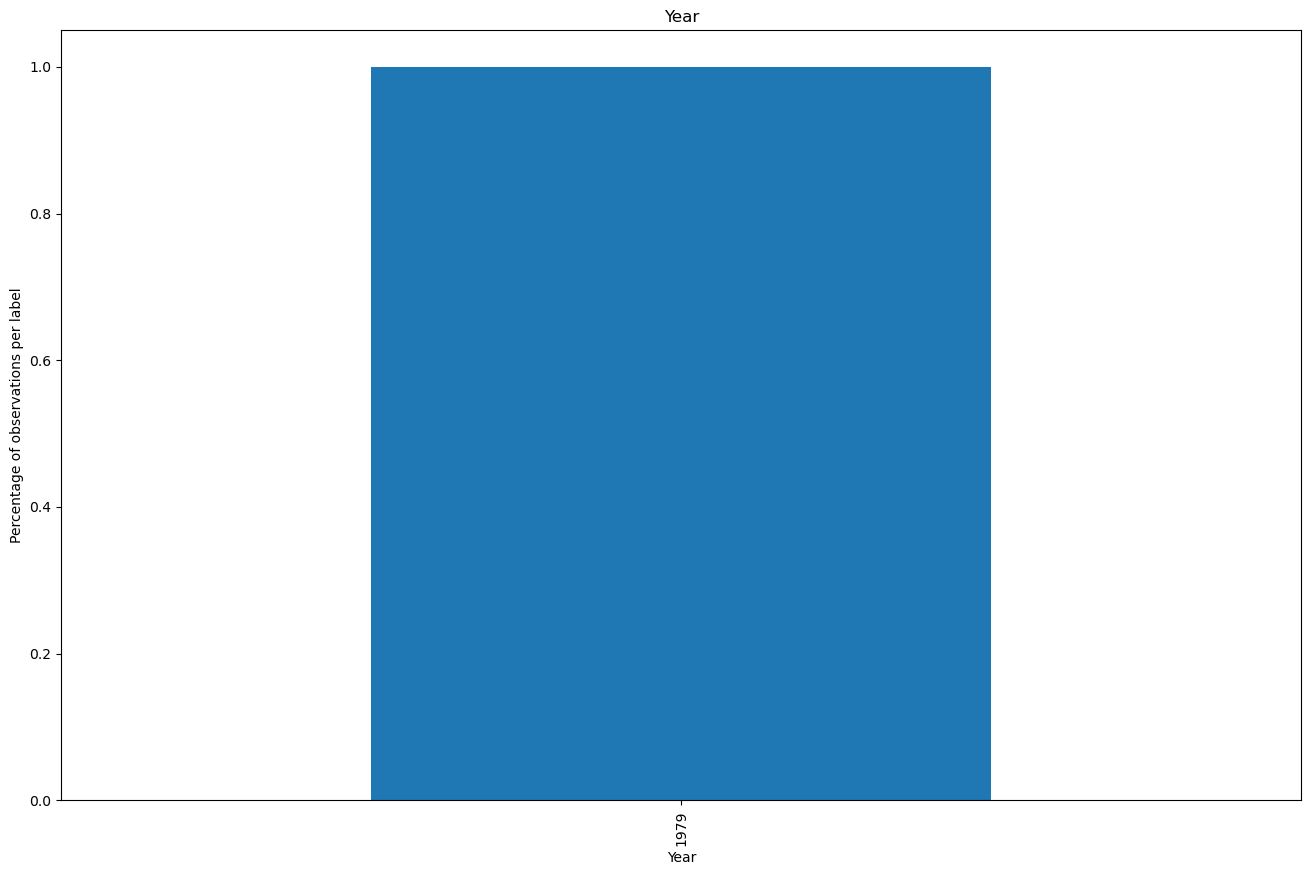

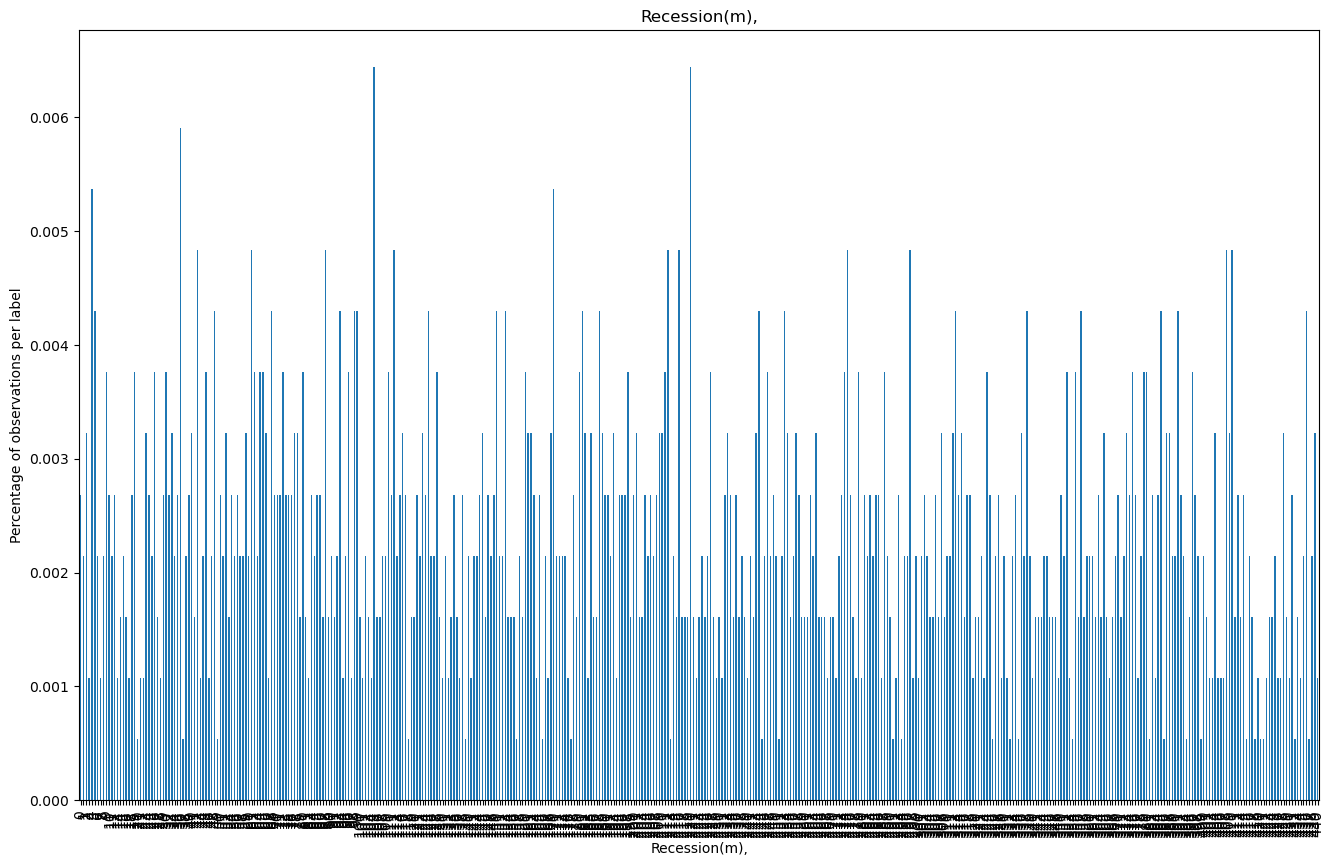

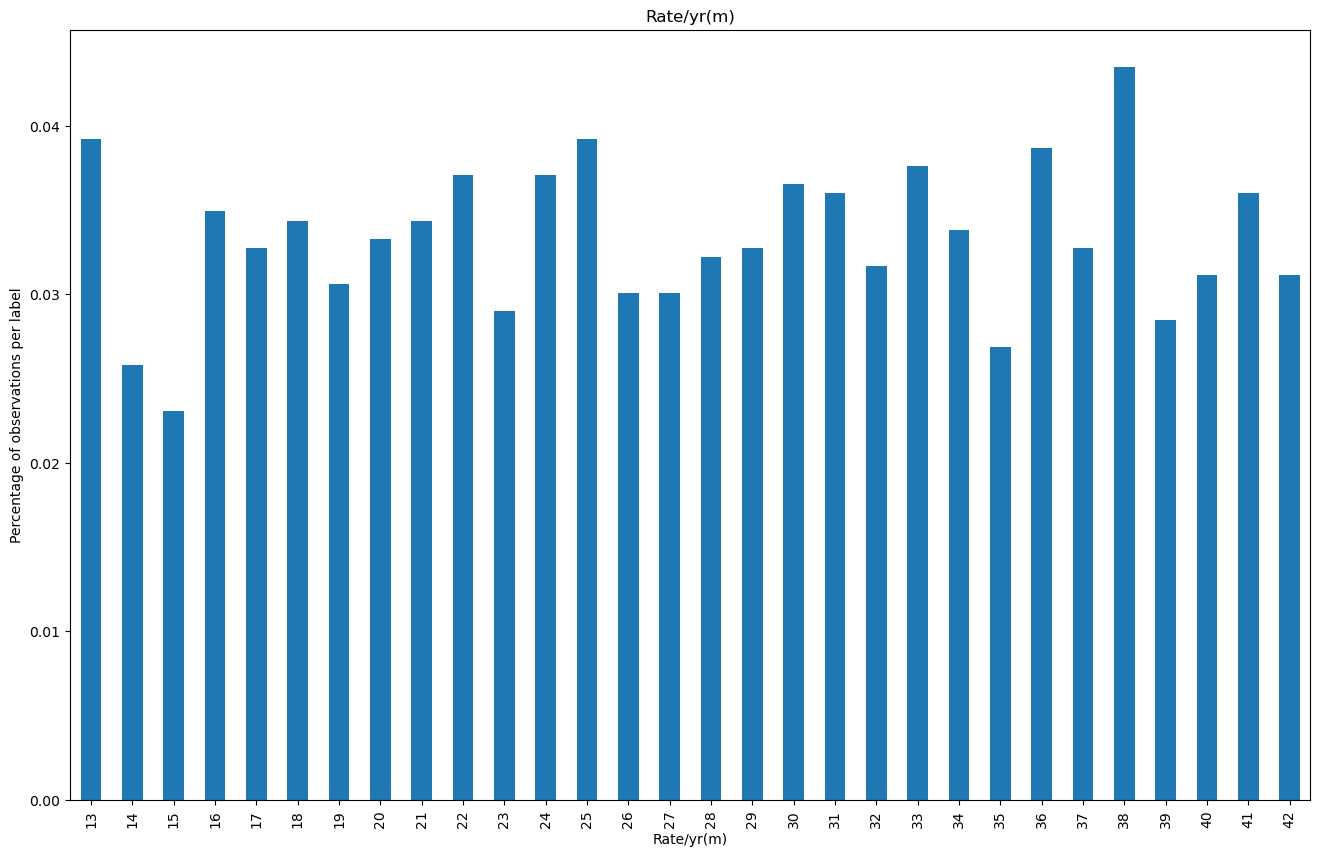

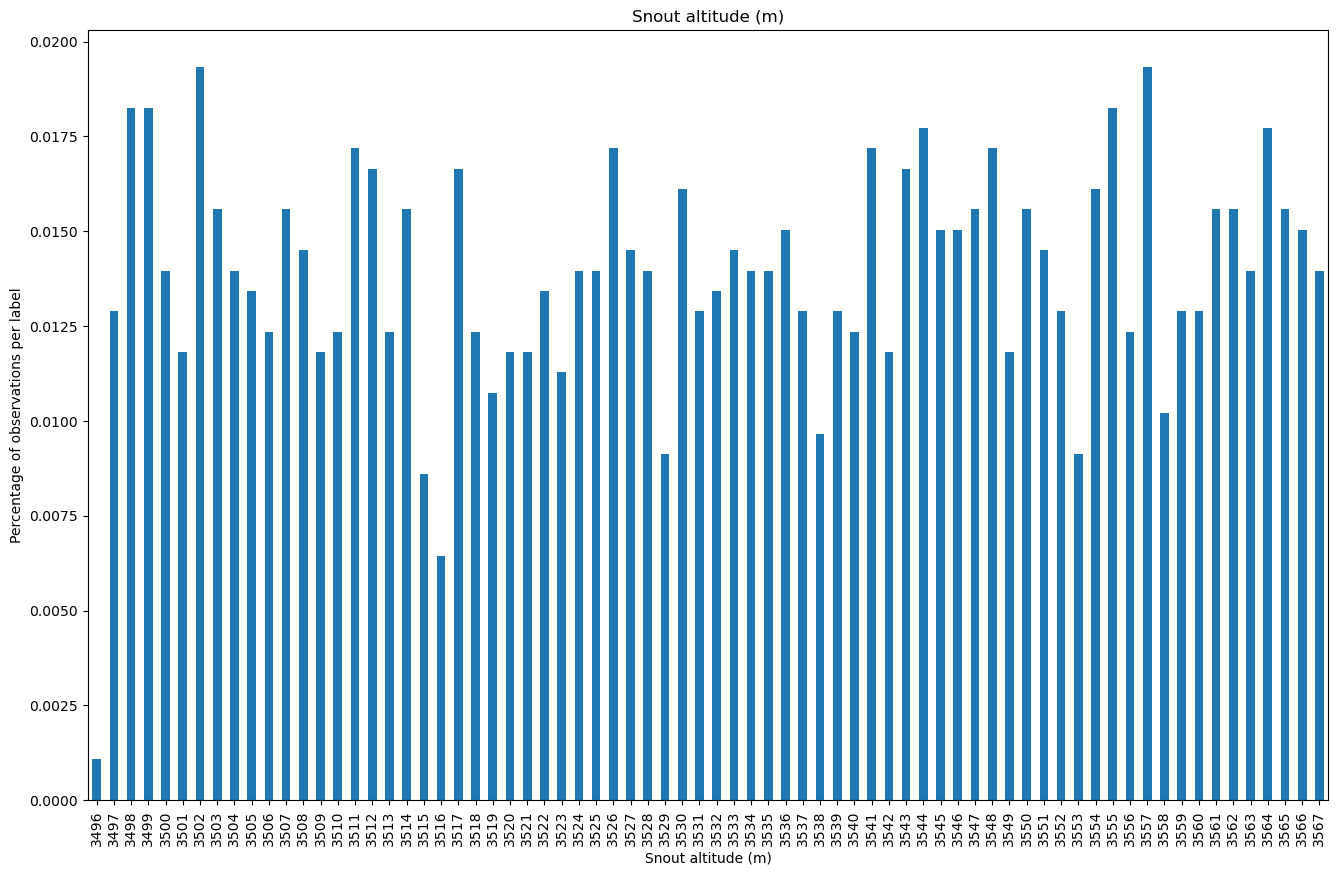

In [13]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()